In [1]:
import mysql.connector

In [2]:
serverName = "awqiquant01.dev.hoopp.cloud"

cnx = mysql.connector.connect(user='quant', password='Password2017',
                              host=serverName,
                              database='cds_basis_trade')
cursor = cnx.cursor()

In [3]:
import urllib.request

urllib.request.urlopen("http://" + serverName + ":8940/CurveOverride/setOverride/US00101JAK25/3/39/")
urllib.request.urlopen("http://" + serverName + ":8940/CurveOverride/setOverride/US00101JAK25/7/150/")
urllib.request.urlopen("http://" + serverName + ":8940/CurveOverride/setOverride/US00101JAK25/9/164/")

In [13]:
query = ("SELECT tenor, cds_spread_value, final_spread_value FROM `stream.cds_curve_point` WHERE isin = 'US00101JAK25' order by tenor")

In [14]:
cursor.execute(query)
result = cursor.fetchall()
for row in result:
    print (row)

(Decimal('2.0'), Decimal('20.0050'), Decimal('20.0050'))
(Decimal('2.5'), Decimal('25.5945'), Decimal('25.5945'))
(Decimal('3.0'), Decimal('33.6714'), Decimal('39.0015'))
(Decimal('3.5'), Decimal('44.1711'), Decimal('44.1711'))
(Decimal('4.0'), Decimal('57.2091'), Decimal('50.0013'))
(Decimal('4.5'), Decimal('69.0403'), Decimal('62.9583'))
(Decimal('5.0'), Decimal('81.0000'), Decimal('81.0000'))
(Decimal('5.5'), Decimal('93.0764'), Decimal('93.0764'))
(Decimal('6.0'), Decimal('105.3626'), Decimal('114.3006'))
(Decimal('6.5'), Decimal('117.7925'), Decimal('131.8629'))
(Decimal('7.0'), Decimal('130.3661'), Decimal('150.0039'))
(Decimal('7.5'), Decimal('137.1954'), Decimal('157.6458'))
(Decimal('8.0'), Decimal('141.8667'), Decimal('161.4956'))
(Decimal('8.5'), Decimal('144.3292'), Decimal('161.5111'))
(Decimal('9.0'), Decimal('144.6097'), Decimal('164.0007'))
(Decimal('9.5'), Decimal('142.7053'), Decimal('150.0818'))
(Decimal('10.0'), Decimal('138.5950'), Decimal('138.5950'))


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5,0,'tenor')

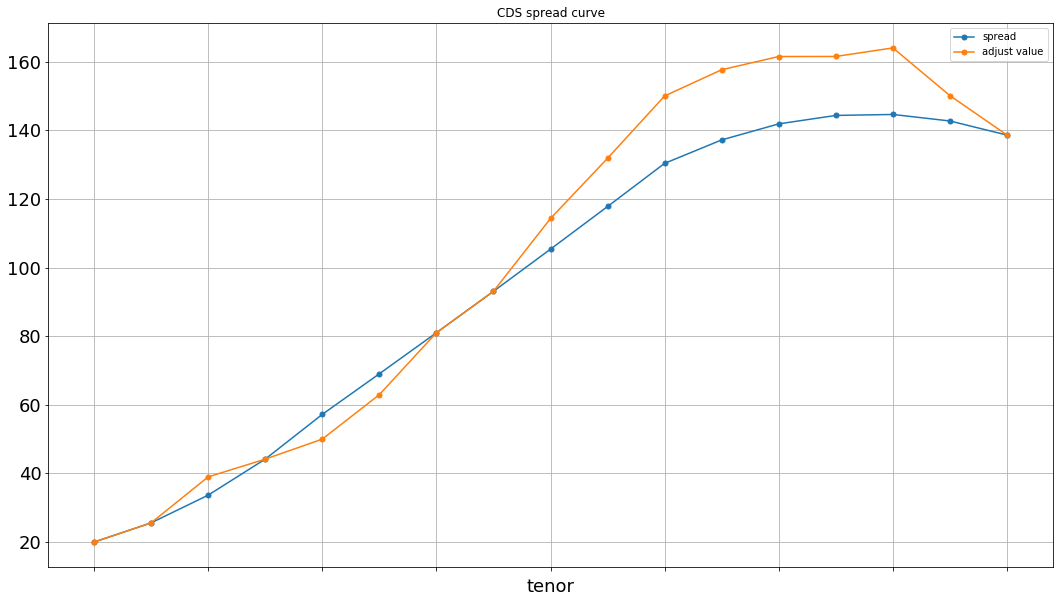

In [16]:
# push data into a dataframe
dft = pd.DataFrame(([row[1], row[2]] for row in result),
                   columns=['spread', 'adjust value'], 
                   index=(row[0] for row in result),
                   dtype=np.float)

# setup chart format
ax = dft[["spread", "adjust value"]].plot.line(grid='true', figsize=(18,10), title='CDS spread curve', 
                                          marker=".", markersize=10, fontsize=18)
ax.set_xlabel('tenor', fontsize=18)
